# COSC 130 \- Project 01

### Kyle Anderson



The goal is to find a Linear regression to create a linear model that can be used to estimate the natural logarithm of average MPG for a vehicle based on the vehicle's weight based on the following: 

• The weight of the vehicle, measured in pounds.

• The average miles per gallon \(MPG\) for the model.

• The natural logarithm of average MPG for the model.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Importing and Viewing the Data

The first tasks will be to import and view the data.


In [2]:
df = pd.read_table(filepath_or_buffer='auto_data.txt', sep='\t')
weight = list(df.wt)
mpg = list(df.mpg)
ln_mpg = list(df.ln_mpg)

Each list contains as required, all 398 values


In [3]:
print('Length of list weight : ' + str(len(weight)))
print('Length of list mpg : ' + str(len(mpg)))
print('Length of list ln_mpg : ' + str(len(ln_mpg)))

Length of list weight : 398
Length of list mpg : 398
Length of list ln_mpg : 398


First 10 vehicles on the list


In [4]:
print("{:>6}{:>8}{:>10}".format("Weight", "MPG", "LN_MPG"))
print("{:-^24}".format(""))
for i in range(0,10):
    print("{:>6}{:>8}{:>10}".format(weight[i], mpg[i], ln_mpg[i]))

Weight     MPG    LN_MPG
------------------------
  3190    27.2    3.3032
  1985    32.8    3.4904
  3410    18.1    2.8959
  4080    17.5    2.8622
  3530    25.4    3.2347
  1773    31.0     3.434
  2670    27.4    3.3105
  1755    39.1    3.6661
  2188    34.3    3.5351
  2155    30.0    3.4012


We will now create two scatter plots


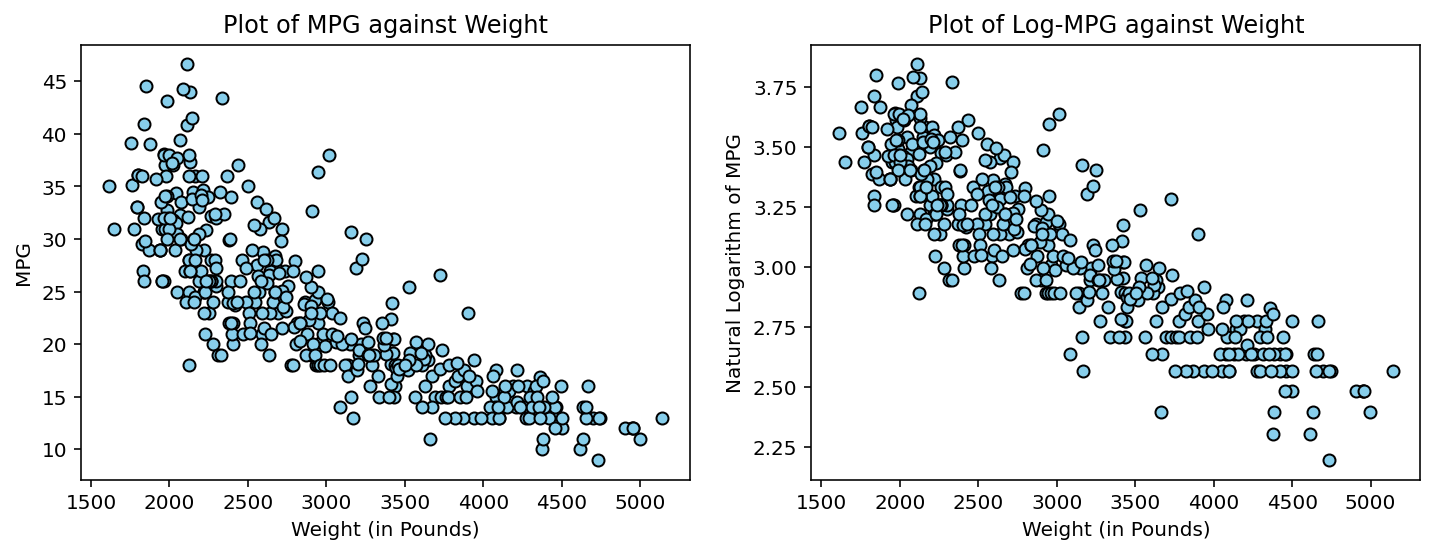

In [5]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.scatter(weight, mpg, c='skyblue', edgecolor='k')
plt.xlabel('Weight (in Pounds)')
plt.ylabel('MPG')
plt.title('Plot of MPG against Weight')
plt.subplot(1,2,2)
plt.scatter(weight, ln_mpg, c='skyblue', edgecolor='k')
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Plot of Log-MPG against Weight')
plt.show()

Observations

Notice that the relationship between MPG and weight in the first scatter plot seems to have a slight bend or curve, whereas the relationship between log\-MPG and weight appears to be mostly linear. Since we will be constructing a linear model, we will use log\-MPG as the response variable in our model.


## Part 2: Splitting the Data

We will now be splitting the data into training and test sets.


In [6]:
x_train = (weight[:300])
x_test = (weight[300:])
y_train = (ln_mpg[:300])
y_test = (ln_mpg[300:])
mpg_train = (mpg[:300])
mpg_test = (mpg[300:])
n_train = (len(x_train))
n_test = (len(x_test))

print('Training Set Size:' + ' ' + str(n_train))
print('Test Set Size:' + ' ' + str(n_test))

Training Set Size: 300
Test Set Size: 98


Create Scatter Plots


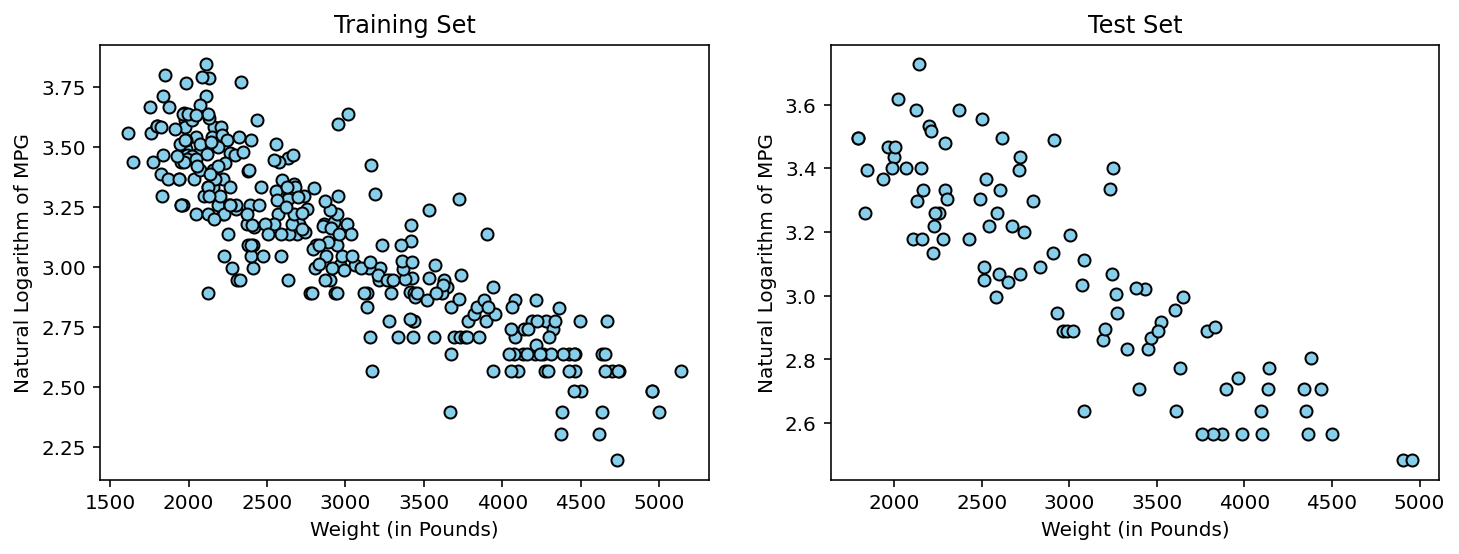

In [7]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, c='skyblue', edgecolor='k')
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Training Set')
plt.subplot(1,2,2)
plt.scatter(x_test, y_test, c='skyblue', edgecolor='k')
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Test Set')
plt.show()

## Part 3: Descriptive Statistics

We will start by calculating the mean of the 𝑋 values \(which represent weight\), and the mean of the 𝑌 values \(which represent log\-MPG\).


In [8]:
mean_x = sum(x_train)/len(x_train)
mean_y = sum(y_train)/len(y_train)

print('Mean of X = {:.2f}'.format(mean_x))
print('Mean of Y = {:.4f}'.format(mean_y))

Mean of X = 2968.62
Mean of Y = 3.1069


Calculating 𝑆𝑥𝑥 and 𝑆𝑦𝑦.


In [9]:
Sxx = sum([((x - mean_x) ** 2) for x in x_train])
Syy = sum([((x - mean_y) ** 2) for x in y_train])

print('Sxx =' + ' ' + str(round(Sxx,2)))
print('Syy =' + ' ' + str(round(Syy,4)))

Sxx = 224006920.44
Syy = 36.0746


Calculating the variance of the training values of 𝑋 and 𝑌.


In [10]:
var_x = sum([((x - mean_x) ** 2) for x in x_train])/len(x_train)
var_y = sum([((x - mean_y) ** 2) for x in y_train])/len(y_train)

print('Variance of X =' + ' ' + str(round(var_x,2)))
print('Variance of Y =' + ' ' + str(round(var_y,4)))

Variance of X = 746689.73
Variance of Y = 0.1202


## Part 4: Linear Regression Model

We will calculate 𝑆𝑋𝑌, which we will then use to find the coefficients for our linear regression model.


In [11]:
Sxy = sum([((x-mean_x)*(y-mean_y)) for x, y in zip(x_train, y_train)])

print("Sxy =", round(Sxy,2))

Sxy = -78999.13


We will now be calculating the coeffecients of our model.


In [12]:
beta_1 = Sxy / Sxx
beta_0 = mean_y - beta_1 * mean_x

print("beta_0 =", round(beta_0, 4))
print("beta_1 =", round(beta_1, 8))

beta_0 = 4.1538
beta_1 = -0.00035266


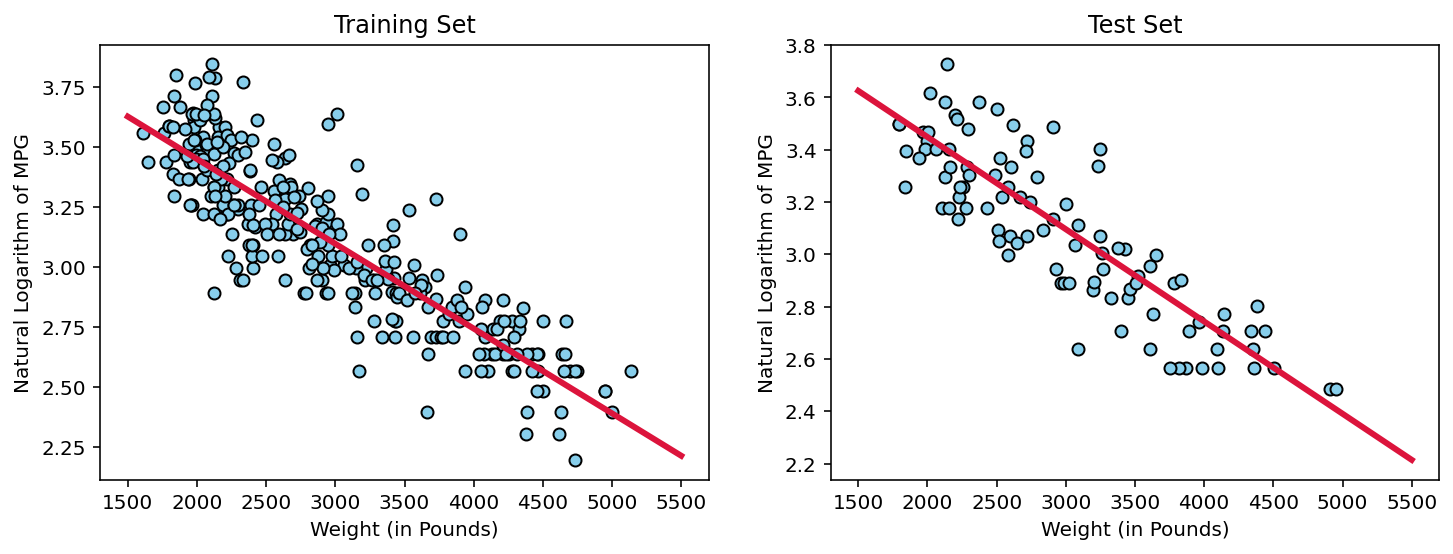

In [13]:
y_vals = [beta_0 + beta_1 * 1500, beta_0 + beta_1 * 5500]
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, c='skyblue', edgecolor='k')
plt.plot([1500,5500], y_vals, c='crimson', lw=3)
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Training Set')
plt.subplot(1,2,2)
plt.scatter(x_test, y_test, c='skyblue', edgecolor='k')
plt.plot([1500,5500], y_vals, c='crimson', lw=3)
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Test Set')
plt.show()

## Part 5: Training Score

We will be calculating the training r\-squared score, and that we will start by calculating estimated response values for the training set.


In [14]:
pred_y_train = [beta_0 + beta_1 * x for x in x_train]

We will now calculate the residuals for the training set.


In [15]:
error_y_train = [y_train[i] - pred_y_train[i] for i in range(len(y_train))]

We will be displaying the values mentioned above.


In [16]:
print(f"{'True y':>6} {'Pred y':>10} {'Error':>10}")
print("-" * 30)
for i in range(10):
    print(f"{y_train[i]:>.4f} {pred_y_train[i]:>10.4f} {error_y_train[i]:>10.4f}")

True y     Pred y      Error
------------------------------
3.3032     3.0289     0.2743
3.4904     3.4538     0.0366
2.8959     2.9513    -0.0554
2.8622     2.7150     0.1472
3.2347     2.9089     0.3258
3.4340     3.5286    -0.0946
3.3105     3.2122     0.0983
3.6661     3.5349     0.1312
3.5351     3.3822     0.1529
3.4012     3.3939     0.0073


We will now calculate the sum of squared errors score for the training set.


In [17]:
sse_train = 0
for i in range(len(y_train)):
    sse_train += error_y_train[i]**2
sse_train = round(sse_train, 4)
print("Training SSE = ", sse_train)

Training SSE =  8.2145


We will now calculate the r\-squared score for the training set.


In [18]:
y_train_mean = sum(y_train)/len(y_train)
r2 = 1 - (sse_train/sum([(y_train[i] - y_train_mean)**2 for i in range(len(y_train))]))
r2 = round(r2, 4)
print("Training r-squared = ", r2)

Training r-squared =  0.7723


## Part 6: Test Score

We will be calculating the test r\-squared score, and that we will start by calculating estimated response values for the test set.


In [19]:
pred_y_test = [beta_0 + beta_1 * x for x in x_test]

We will now calculate the residuals for the test set.


In [20]:
error_y_test = [y_test[i] - pred_y_test[i] for i in range(len(y_test))]

We will be displaying the values mentioned above.


In [21]:
print(f"{'True y':>6} {'Pred y':>10} {'Error':>10}")
print("-" * 30)
for i in range(10):
    print(f"{y_test[i]:>6.4f} {pred_y_test[i]:>10.4f} {error_y_test[i]:>10.4f}")

True y     Pred y      Error
------------------------------
2.6391     3.0655    -0.4264
2.8904     2.8190     0.0714
2.9957     2.8663     0.1294
2.5649     2.7890    -0.2241
2.9957     3.2433    -0.2476
2.9444     3.1205    -0.1761
2.4849     2.4237     0.0612
3.2581     3.3586    -0.1005
3.7257     3.3977     0.3280
2.5649     2.7474    -0.1825


We will now calculate the sum of squared errors score for the test set.


In [22]:
sse_test = 0
for i in range(len(y_test)):
    sse_test += error_y_test[i]**2
sse_test = round(sse_test, 4)
print("Test SSE =", sse_test)

Test SSE = 2.4848


We will now calculate the value of 𝑆𝑌𝑌 on the test set, and will then use that and the test sum of squared errors to calculate the test r\-squared score.



In [23]:
y_test_mean = sum(y_test)/len(y_test)
r2 = 1 - (sse_test/sum([(y_test[i] - y_test_mean)**2 for i in range(len(y_test))]))
r2 = round(r2, 4)
print("Test r-Squared = ", r2)

Test r-Squared =  0.7435


We will now create a plot to visualize the errors for the observations in the test set.


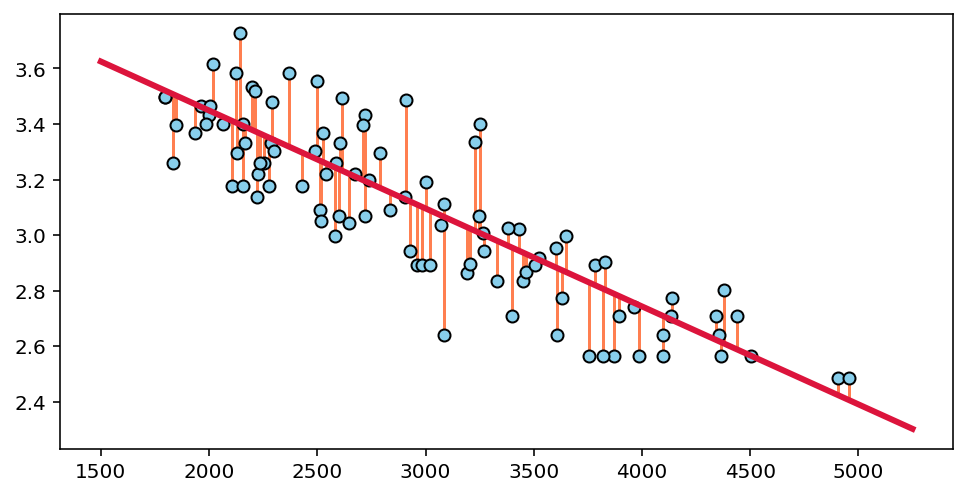

In [24]:
plt.figure(figsize=[8,4])
plt.scatter(x_test, y_test, c='skyblue', edgecolor='k')
plt.plot([1500,5250], [beta_0 + beta_1 * 1500, beta_0 + beta_1 * 5250],
         c='crimson', lw=3)
for i in range(n_test):
    plt.plot([x_test[i], x_test[i]], [pred_y_test[i], y_test[i]],
             c='coral', zorder=0) 
plt.show()

## Part 7: Transforming Test Predictions

We will be calculating estimates for the average MPG for observations in our test set.



In [25]:
e = 2.718281828
pred_mpg_test = [e ** y for y in pred_y_test]
for i in pred_y_test:
    pred_mpg_test.append(e**i)
print(pred_mpg_test)

[21.44577873921567, 16.760347507964692, 17.571403498592122, 16.26538785401307, 25.617363661741102, 22.658688681076864, 11.287316943931428, 28.748668543724676, 29.896372060886925, 15.602405113060396, 26.26689812266614, 29.0237185706579, 15.008730385084755, 20.65160010298365, 30.04434420885484, 27.02805196541944, 16.49646239914652, 25.455261009616294, 19.684480342927134, 33.33841226922161, 11.093941787939468, 24.81704329885711, 30.09736870878049, 31.84447694998286, 20.098349355108148, 18.99567802381178, 18.8688208342616, 20.27633181202063, 16.548904927895574, 22.404417354843392, 20.3838769414681, 24.400479510366964, 29.311735477042525, 28.962369809421144, 18.369807481977784, 29.686246600441525, 13.776093739942185, 13.713080011896384, 13.58791593749569, 27.606054560187324, 31.45382903184229, 33.81203506381617, 31.620659311905218, 28.416033593180302, 20.564387909575153, 33.81203506381617, 17.689538006512002, 26.462151317303537, 24.47804904117008, 18.762651050709795, 22.23126294483854, 25.9

We will now calculate the error in each estimate for the average MPG.


In [26]:
error_mpg_test = [mpg_test[i] - pred_mpg_test [i] for i in range (len(mpg_test))]

We will now display the true MPG, the estimated MPG, and the estimation error for each of the first 10 observations in the test set.


In [29]:
print ("True MPG    Pred MPG    Error")
print("-" * 29)
for i in range (len (mpg_test)):
    if i == 10:
        break
    print ("{:8.1f}{:12.1f}{:9.1f}".format (mpg_test [i], pred_mpg_test[i], error_mpg_test[i]))

True MPG    Pred MPG    Error
-----------------------------
    14.0        21.4     -7.4
    18.0        16.8      1.2
    20.0        17.6      2.4
    13.0        16.3     -3.3
    20.0        25.6     -5.6
    19.0        22.7     -3.7
    12.0        11.3      0.7
    26.0        28.7     -2.7
    41.5        29.9     11.6
    13.0        15.6     -2.6
